In [17]:
import polars as pl

In [18]:
df = pl.read_excel('training_set_rel3.xlsx', infer_schema_length=15000)
df

essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,rater1_trait1,rater1_trait2,rater1_trait3,rater1_trait4,rater1_trait5,rater1_trait6,rater2_trait1,rater2_trait2,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
i64,i64,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
1,1,"""Dear local newspaper, I think …",4,4,null,8,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2,1,"""Dear @CAPS1 @CAPS2, I believe …",5,4,null,9,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
3,1,"""Dear, @CAPS1 @CAPS2 @CAPS3 Mor…",4,3,null,7,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
4,1,"""Dear Local Newspaper, @CAPS1 I…",5,5,null,10,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
5,1,"""Dear @LOCATION1, I know having…",4,4,null,8,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
21626,8,""" In most stories mothers and d…",17,18,null,35,null,null,null,4,3,4,4,4,3,4,4,4,4,4,3,null,null,null,null,null,null
21628,8,""" I never understood the meanin…",15,17,null,32,null,null,null,3,3,4,3,3,3,4,3,4,4,4,3,null,null,null,null,null,null
21629,8,"""When you laugh, is @CAPS5 out …",20,26,40,40,null,null,null,4,4,4,4,4,4,6,5,5,5,5,5,4,4,4,4,4,4


In [19]:
df_7 = df.filter(pl.col('essay_set') == 7)
df_7 = df_7.with_columns(
    (pl.col('rater1_trait1') + pl.col('rater2_trait1')).alias('Content'), # ルーブリック上はIdeasだが，Contentとして扱う
    (pl.col('rater1_trait2') + pl.col('rater2_trait2')).alias('Organization'),
    (pl.col('rater1_trait3') + pl.col('rater2_trait3')).alias('Style'),
    (pl.col('rater1_trait4') + pl.col('rater2_trait4')).alias('Conventions'),
)
df_7 = df_7.select(['essay_id', 'Content', 'Organization', 'Style', 'Conventions'])
df_7

essay_id,Content,Organization,Style,Conventions
i64,i64,i64,i64,i64
17834,2,4,4,5
17836,3,3,4,3
17837,3,4,4,4
17838,4,4,4,5
17839,2,4,3,4
…,…,…,…,…
19558,3,4,3,2
19559,2,4,4,6
19561,5,5,4,5


In [20]:
df_8 = df.filter(pl.col('essay_set') == 8)
df_8 = df_8.with_columns([
    pl.when(pl.col("rater3_trait1").is_null())
      .then(pl.col(f"rater1_trait{i+1}") + pl.col(f"rater2_trait{i+1}"))
      .otherwise(pl.col(f"rater3_trait{i+1}") * 2)
      .alias(trait)
    for i, trait in enumerate(['Content', 'Organization', 'Voice', 'Word Choice', 'Sentence Fluency', 'Conventions'])
])
df_8 = df_8.select(['essay_id', 'Content', 'Organization', 'Voice', 'Word Choice', 'Sentence Fluency', 'Conventions'])
df_8

essay_id,Content,Organization,Voice,Word Choice,Sentence Fluency,Conventions
i64,i64,i64,i64,i64,i64,i64
20716,7,8,8,8,7,6
20717,10,10,10,10,10,8
20718,8,8,8,8,8,8
20719,6,6,6,6,6,6
20721,6,5,6,6,5,5
…,…,…,…,…,…,…
21626,8,7,8,8,8,6
21628,7,6,8,7,7,6
21629,8,8,8,8,8,8


In [6]:
dfs = [pl.read_csv(f'Prompt-{num}.csv', infer_schema_length=3000).rename({'Essay ID': 'essay_id'}) for num in range(1, 6+1)]
dfs += [df_7, df_8]
df_trait = pl.concat(dfs, how='diagonal')
df_trait

essay_id,Content,Organization,Word Choice,Sentence Fluency,Conventions,Prompt Adherence,Language,Narrativity,Style,Voice
i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
1,4,3,3,3,3,null,null,null,null,null
2,4,4,4,3,4,null,null,null,null,null
3,3,3,3,4,4,null,null,null,null,null
4,5,4,5,4,4,null,null,null,null,null
5,4,3,4,4,4,null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…
21626,8,7,8,8,6,null,null,null,null,8
21628,7,6,7,7,6,null,null,null,null,8
21629,8,8,8,8,8,null,null,null,null,8


In [21]:
rename_map = {
    'domain1_score': 'overall',
    'Content': 'content',
    'Organization': 'organization',
    'Voice': 'voice',
    'Word Choice': 'word_choice',
    'Sentence Fluency': 'sentence_fluency',
    'Conventions': 'conventions',
    'Prompt Adherence': 'prompt_adherence',
    'Language': 'language',
    'Narrativity': 'narrativity',
    'Style': 'style',
}
asap = df.select(['essay_id', 'essay_set', 'essay', 'domain1_score']).join(df_trait, on='essay_id', how='left')
asap = asap.rename(rename_map)
asap

essay_id,essay_set,essay,overall,content,organization,word_choice,sentence_fluency,conventions,prompt_adherence,language,narrativity,style,voice
i64,i64,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
1,1,"""Dear local newspaper, I think …",8,4,3,3,3,3,null,null,null,null,null
2,1,"""Dear @CAPS1 @CAPS2, I believe …",9,4,4,4,3,4,null,null,null,null,null
3,1,"""Dear, @CAPS1 @CAPS2 @CAPS3 Mor…",7,3,3,3,4,4,null,null,null,null,null
4,1,"""Dear Local Newspaper, @CAPS1 I…",10,5,4,5,4,4,null,null,null,null,null
5,1,"""Dear @LOCATION1, I know having…",8,4,3,4,4,4,null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…
21626,8,""" In most stories mothers and d…",35,8,7,8,8,6,null,null,null,null,8
21628,8,""" I never understood the meanin…",32,7,6,7,7,6,null,null,null,null,8
21629,8,"""When you laugh, is @CAPS5 out …",40,8,8,8,8,8,null,null,null,null,8


In [7]:
asap.write_csv('asap_with_traits.csv')

# Visualization

In [27]:
import polars as pl
asap = pl.read_csv('asap_with_traits.csv', infer_schema_length=15000)

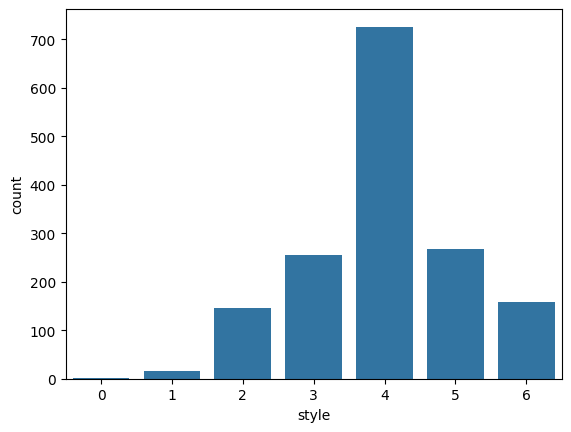

In [28]:
ESSAY_SET = 7
TRAIT = 'style'

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=asap.filter(pl.col('essay_set') == ESSAY_SET), x=TRAIT)
plt.show()